<a href="https://colab.research.google.com/github/NguyenDuyHoangQN/ann/blob/main/hoa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img, img_to_array
from keras.models import Sequential
from keras.layers import Dense, Activation, BatchNormalization, Dropout, Conv2D, MaxPooling2D, Flatten
import matplotlib.pyplot as plt
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
folder = '/content/drive/MyDrive/hoa/'

photos, labels = list(), list()
for file in listdir(folder):
  if file.startswith('cuc'):
    output = 0
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoathuocduoc'):
    output = 1
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoamattroi'):
    output = 2
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

for file in listdir(folder):
  if file.startswith('hoavantho'):
    output = 3
    photo = load_img(folder+file,target_size=(150,150))
    photo = img_to_array(photo)
    photos.append(photo)
    labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape,labels.shape)

(80, 150, 150, 3) (80,)


Epoch 1/20
2/2 [==============================] - 5s 740ms/step - loss: 246.2017 - accuracy: 0.0000e+00
Epoch 2/20
2/2 [==============================] - 4s 717ms/step - loss: 322.4603 - accuracy: 0.3125
Epoch 3/20
2/2 [==============================] - 4s 749ms/step - loss: 338.4086 - accuracy: 0.3625
Epoch 4/20
2/2 [==============================] - 4s 748ms/step - loss: 96.2190 - accuracy: 0.3125
Epoch 5/20
2/2 [==============================] - 4s 746ms/step - loss: 35.1412 - accuracy: 0.2500
Epoch 6/20
2/2 [==============================] - 4s 748ms/step - loss: 4.7867 - accuracy: 0.4250
Epoch 7/20
2/2 [==============================] - 3s 737ms/step - loss: 6.5791 - accuracy: 0.5375
Epoch 8/20
2/2 [==============================] - 3s 715ms/step - loss: 1.4676 - accuracy: 0.5875
Epoch 9/20
2/2 [==============================] - 3s 741ms/step - loss: 0.6930 - accuracy: 0.7500
Epoch 10/20
2/2 [==============================] - 4s 774ms/step - loss: 0.6307 - accuracy: 0.7250
Epoch 1

'hoathuocduoc'

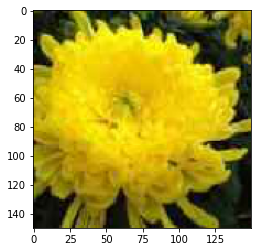

In [4]:
save('hoa_photos.npy', photos)
save('hoa_labels.npy', labels)
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(150,150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(16, activation='softmax'))


model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(photos, labels, batch_size=64,epochs=20, verbose=1)
model.save('hoa.h5')
classes = ["cuc","hoavantho","hoathuocduoc","hoamattroi"]
img = load_img('/content/drive/MyDrive/hoa/cuc.0.jpg', target_size=(150,150))
plt.imshow(img)
imgRe = img_to_array(img)
imgRe = imgRe.reshape(1,150,150,3)  
imgRe = imgRe.astype('float32')
imgRe /= 255
y_pred = model.predict(imgRe)
print(y_pred)
y_classes = [np.argmax(element) for element in y_pred]
y_classes
classes[y_classes[0]]

In [10]:
from keras.preprocessing.image   import load_img
from keras.preprocessing.image  import img_to_array
from keras.models               import load_model
import numpy as np
import matplotlib.pyplot as plt

img = load_img('hoacuc.jpg', target_size=(150, 150))
img = img_to_array(img)
img = img.reshape(1, 150, 150, 3)
img = img.astype('float32')
img = img / 255.0

# load model
model = load_model('/content/hoa.h5')
# predict the class
result = model.predict(img)
print('Giá trị dự đoán:', np.argmax(result))
plt.show()

Giá trị dự đoán: 2
